In [1]:
import sys

sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from mlresearch.utils import set_matplotlib_style
from algorec.recourse import NFeatureRecourse
from algorec.populations import BasePopulation
from algorec.environments import BankLoanApplication2

In [3]:
set_matplotlib_style(16)

# Some variables to define the problem
RNG_SEED = 42
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 1000

# Environment variables
N_LOANS = 200  # np.array([20, 1, 10, 30, 0, 5, 50, 10, 40])
ADAPTATION = 100  # np.array([.2, .1, .3, .25, .1, .4, .05, .05, .2])
NEW_AGENTS = 700  # np.array([40, 10, 50, 5, 0, 100, 0, 0, 20])

# TODO: end and stop from updating when population becomes too small

# Generate data and fit regression
continuous = [f"f_{i}" for i in range(N_CONTINUOUS)]
categorical = [f"cat_{i}" for i in range(N_CAT)]
rng = np.random.default_rng(RNG_SEED)
df = pd.DataFrame(
    rng.random((N_AGENTS, N_CONTINUOUS)),
    columns=[f"f_{i}" for i in range(N_CONTINUOUS)],
)

for i in range(N_CAT):
    df[f"cat_{i}"] = rng.integers(0, 2, N_AGENTS)

y = rng.integers(0, 2, N_AGENTS)
lr = LogisticRegression().fit(df, y)

In [4]:
# Define the necessary components to run simulation
population = BasePopulation(df, categorical=categorical)
recourse = NFeatureRecourse(lr, n_features=2)
environment = BankLoanApplication2(
    population,
    recourse,
    n_loans=N_LOANS,
    adaptation=ADAPTATION,
    new_agents=NEW_AGENTS,
    random_state=RNG_SEED,
)

environment.run_simulation(100)

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Population scores over 101 time steps'}, xlabel='Step', ylabel='Score'>)

/home/joaofonseca/miniconda3/envs/recourse-game/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/joaofonseca/miniconda3/envs/recourse-game/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


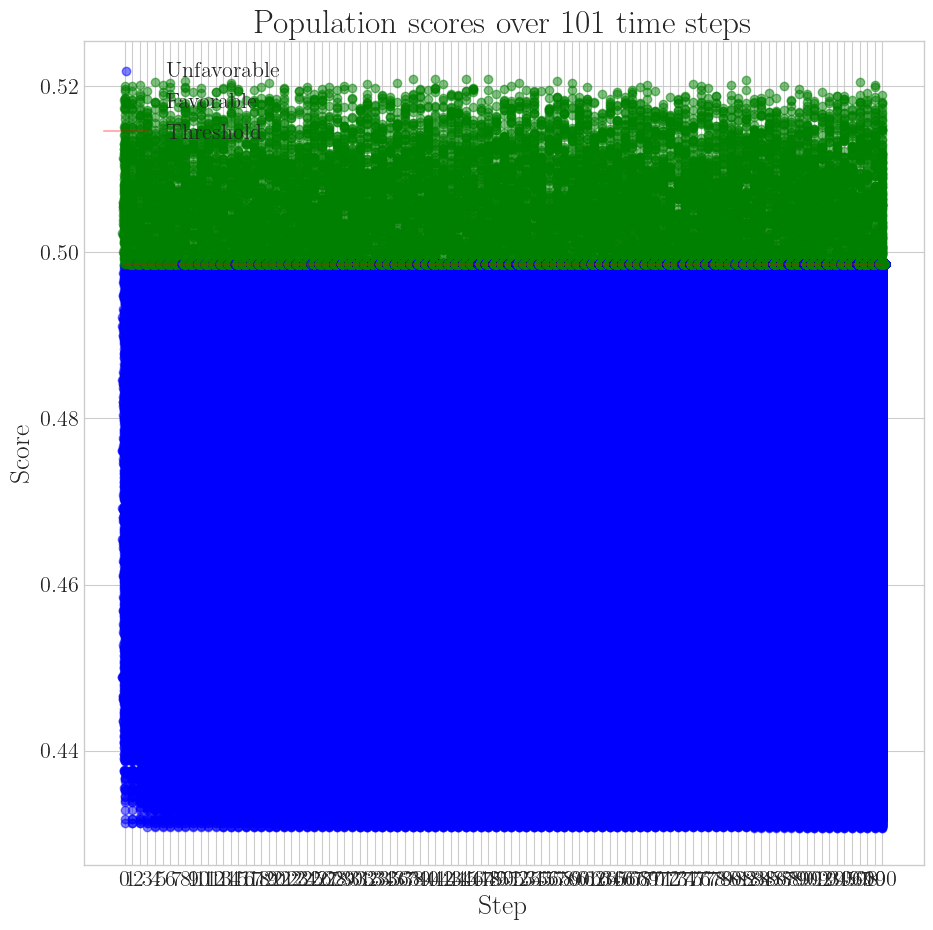

In [5]:
environment.plot.agent_scores()

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Population at t=25'}, xlabel='f_0', ylabel='f_1'>)

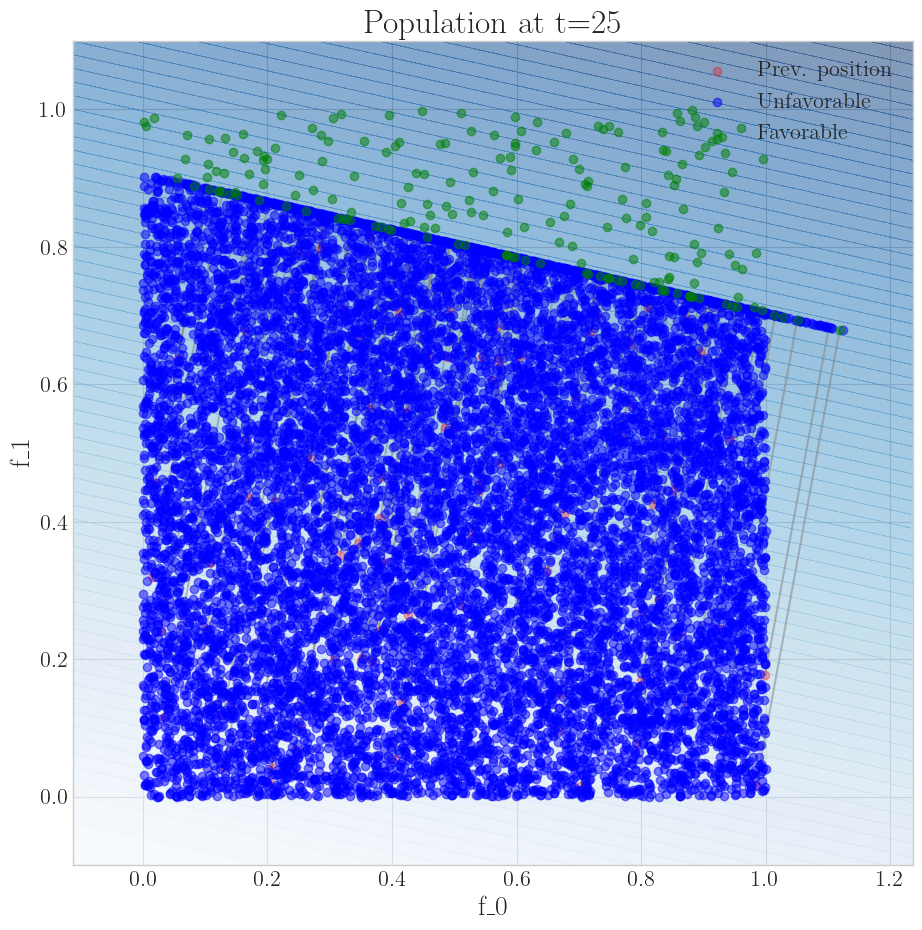

In [6]:
environment.plot.scatter(25)

(array([ 38., 113., 106., 117., 116., 135., 113., 109., 103.,  50.]),
 array([0.43132108, 0.44019049, 0.44905989, 0.4579293 , 0.46679871,
        0.47566811, 0.48453752, 0.49340693, 0.50227634, 0.51114574,
        0.52001515]),
 <BarContainer object of 10 artists>)

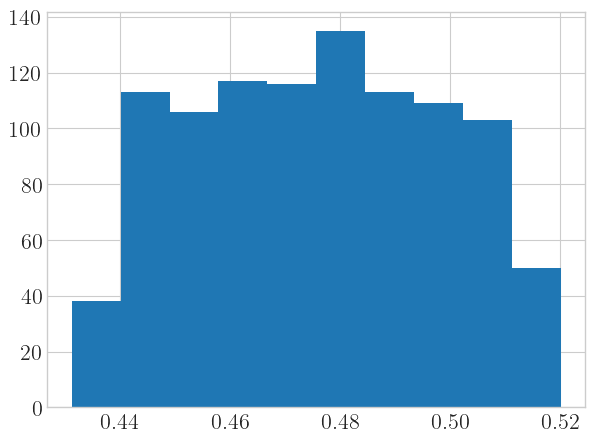

In [7]:
environment.plot.scores_histogram(0)

<Axes: ylabel='Density'>

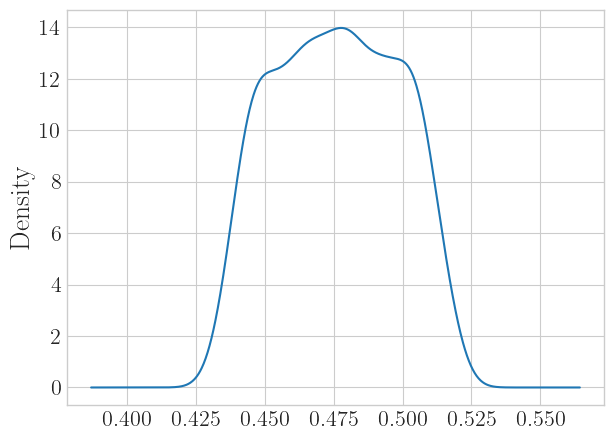

In [8]:
environment.plot.scores_kde(0)
# environment.plot.scores_kde(100)

<Axes: title={'center': 'Population size over 101 time steps'}, xlabel='Step', ylabel='Number of agents'>

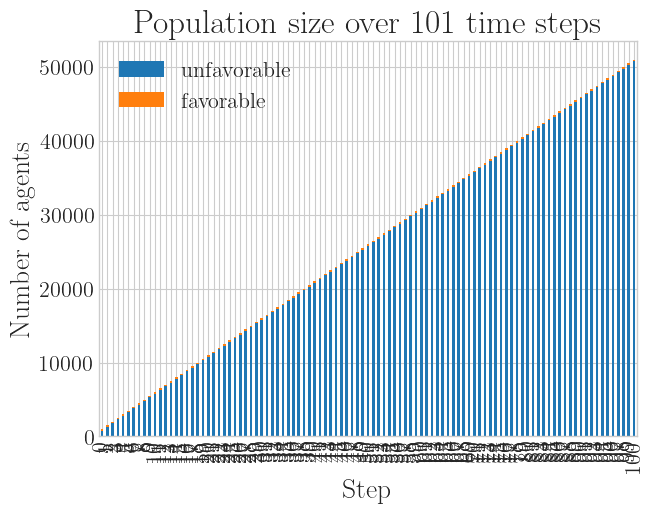

In [9]:
environment.plot.population_size()

In [10]:
environment.success_rate(1, 20)

array([0.61, 0.63, 0.25, 0.36, 0.26, 0.21, 0.24, 0.26, 0.31, 0.15, 0.12,
       0.12, 0.11, 0.1 , 0.17, 0.08, 0.06, 0.13, 0.11])

In [11]:
environment.threshold_drift(1, 100)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
environment.agents_info()

,entered_step,n_adaptations,favorable_step,original_score,final_score,n_failures
0,0,0,NaN,0.475112,NaN,0
1,0,1,NaN,0.495944,NaN,1
2,0,0,0.0,0.505292,0.505292,0
3,0,0,0.0,0.501162,0.501162,0
4,0,0,NaN,0.466125,NaN,0
...,...,...,...,...,...,...
70995,100,0,NaN,0.453715,NaN,0
70996,100,0,NaN,0.443979,NaN,0
70997,100,0,NaN,0.485885,NaN,0
70998,100,0,100.0,0.506764,0.506764,0


In [13]:
environment.metadata_[0]["threshold"]

0.4985651886488125

In [14]:
# probability of an agent to be above the threshold
p = environment.new_agent_proba(environment.metadata_[10]["threshold"])

# number of observations to generate to have 10 observations above threshold
n = 100 / p
n

500.0

In [15]:
environment.steps_info()

,n_adapted,n_candidates,favorable_outcomes,success_rate,threshold,threshold_drift,new_agents,new_agents_proba
1,100.0,100.0,200.0,0.61,0.498565,0.0,700.0,0.2
2,100.0,100.0,200.0,0.63,0.498565,0.0,700.0,0.2
3,100.0,100.0,200.0,0.25,0.498565,0.0,700.0,0.2
4,100.0,100.0,200.0,0.36,0.498565,0.0,700.0,0.2
5,100.0,100.0,200.0,0.26,0.498565,0.0,700.0,0.2
...,...,...,...,...,...,...,...,...
96,100.0,100.0,200.0,0.01,0.498565,0.0,700.0,0.2
97,100.0,100.0,200.0,0.01,0.498565,0.0,700.0,0.2
98,100.0,100.0,200.0,0.01,0.498565,0.0,700.0,0.2
99,100.0,100.0,200.0,0.01,0.498565,0.0,700.0,0.2


<Axes: >

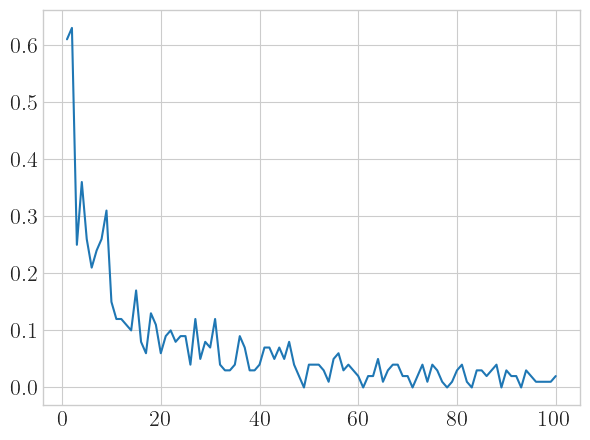

In [16]:
environment.steps_info().success_rate.plot.line()